# Test notebook
This is a test notebook to show how to open and visualise data from a data source


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Import and check the data
Import the data from a local file and reset the column names

In [156]:
df = pd.read_csv('fortune500.csv')
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Head and tail the file

In [157]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [158]:
df.tail()

,year,rank,company,revenue,profit
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Run some tests om the data 

In [159]:
len(df)

25500

In [160]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

## Clean the data
we can see the profit is defined as an object, we expect it to be a float 
means we have non-numeric data in there.  Lets look at them 

In [161]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Check how many of them are non-numeric

In [162]:
len(df[non_numeric_profits])

369

Check histogram of the distribution of the N.As

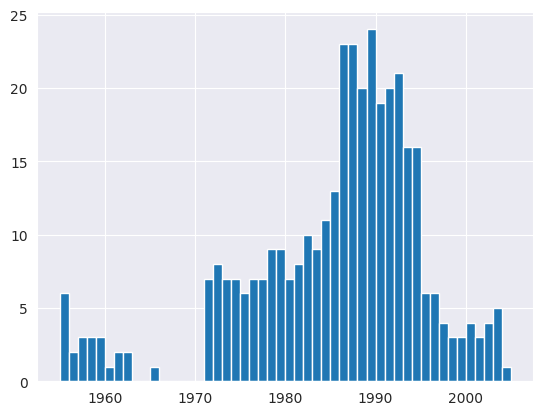

In [163]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

Remove all the rows with non-numeric data in them

In [164]:
# loc locates rows from within a data set
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)
len(df)
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Data is now all clean.

## Plot the data

In [165]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

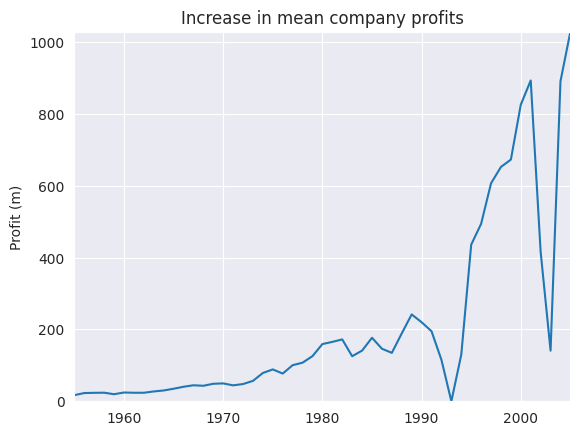

In [166]:
fig, ax = plt.subplots()
plot(x, y, ax, "Increase in mean company profits", "Profit (m)")

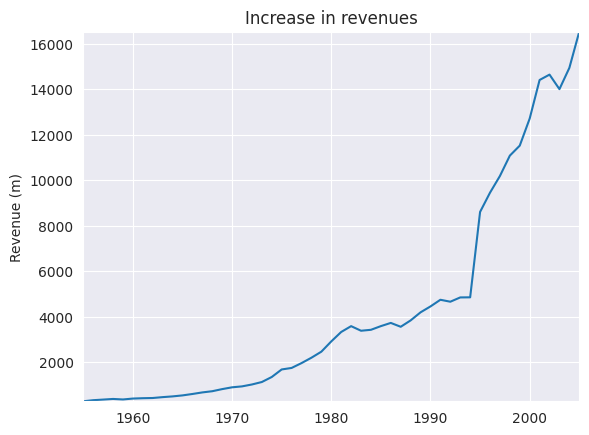

In [167]:
y2 = avgs.revenue
fig2, ax = plt.subplots()
plot(x, y2, ax, "Increase in revenues", "Revenue (m)")